In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [8]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


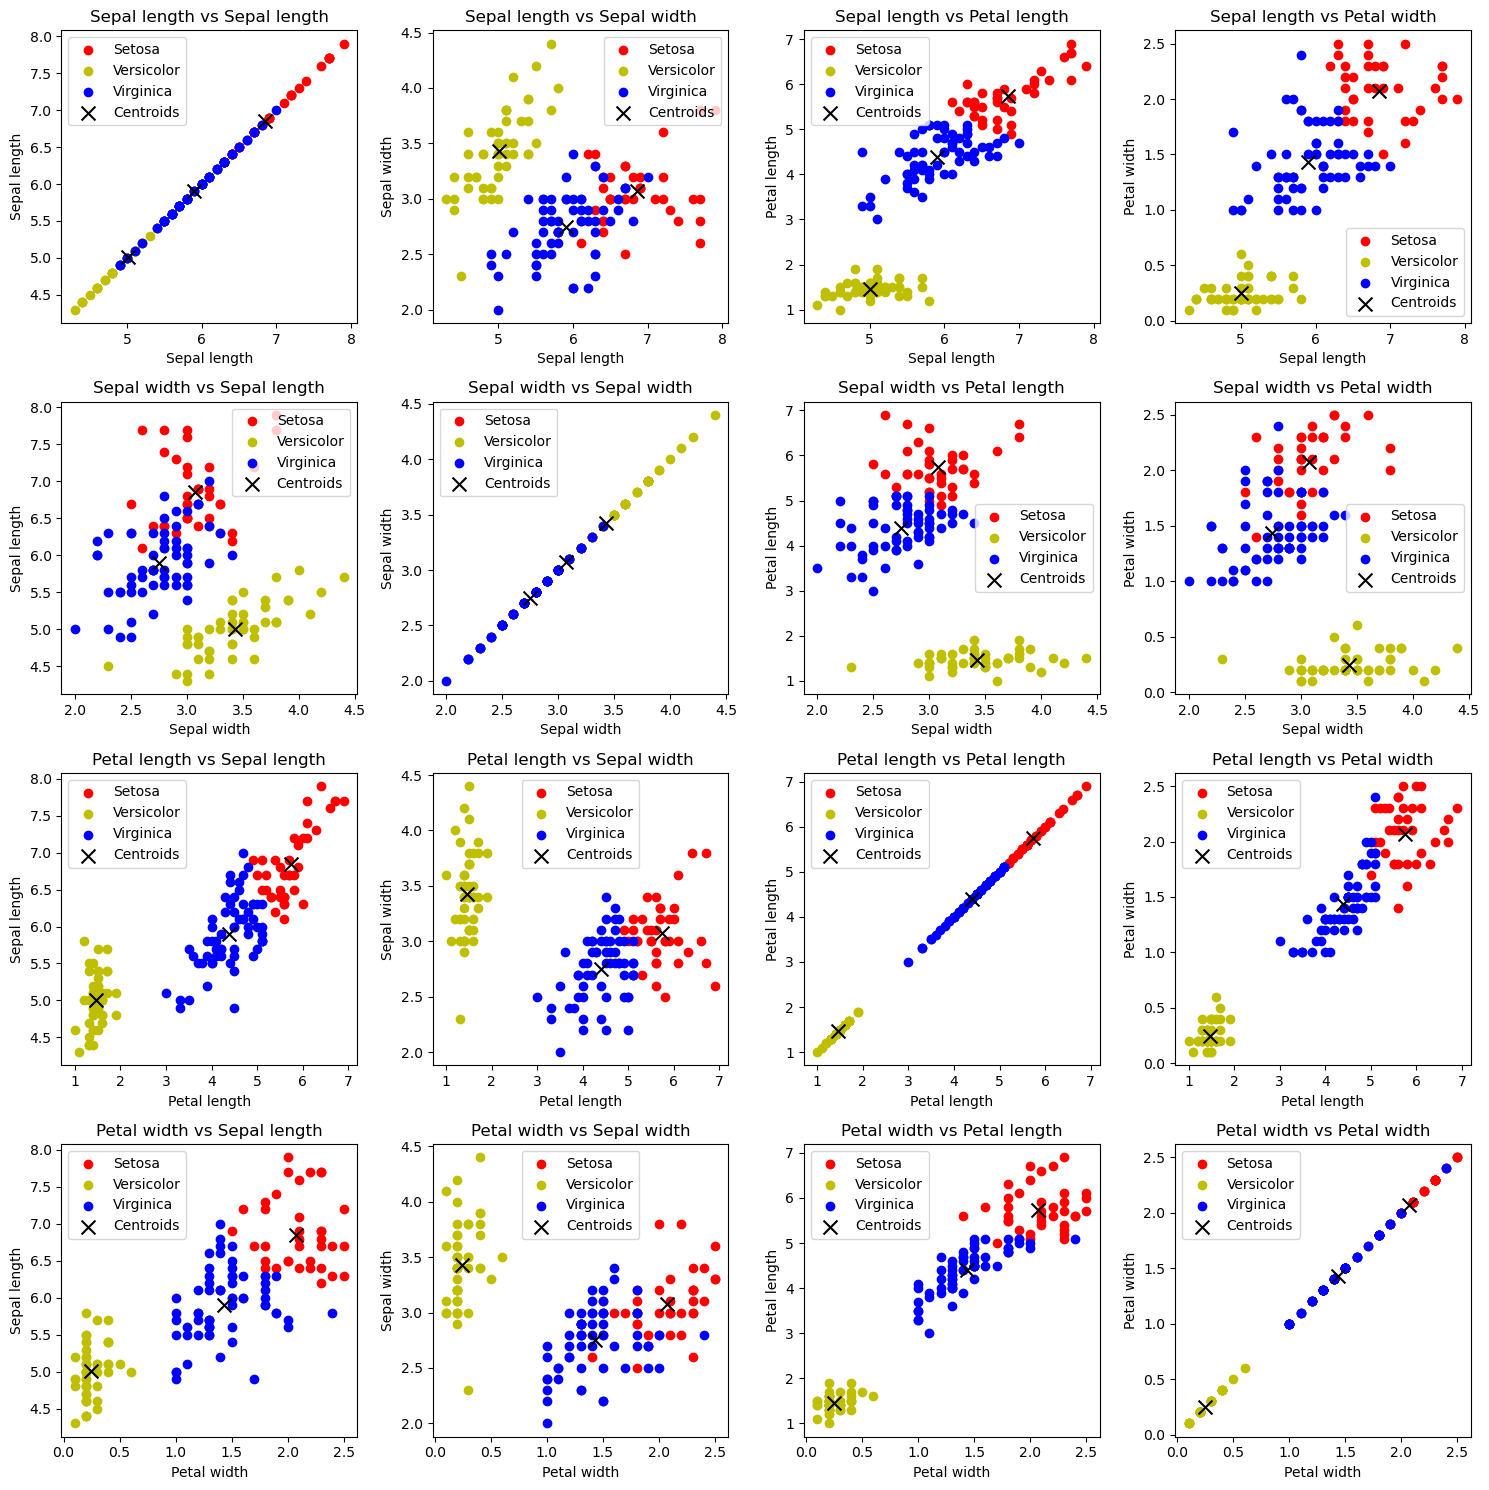

Adjusted Rand Score for My K-Means: 0.7302382722834697


In [4]:
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
n_clusters = 3
colors = ['r', 'y', 'b']

species_labels = ['Setosa', 'Versicolor', 'Virginica']

# Creating subplots for different feature combinations
fig, axes = plt.subplots(len(feature_names), len(feature_names), figsize=(15, 15))

for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        feature1 = feature_names[i]
        feature2 = feature_names[j]

        # Plotting data points for each cluster
        for cluster_label in range(n_clusters):
            species_data = X[kmeans_labels == cluster_label]
            axes[i, j].scatter(
                species_data[:, i],
                species_data[:, j],
                label=species_labels[cluster_label],
                c=colors[cluster_label],
            )

        # Scatter plot the centroids
        axes[i, j].scatter(
            kmeans.cluster_centers_[:, i],
            kmeans.cluster_centers_[:, j],
            c='black',
            marker='x',
            s=100,
            label='Centroids',
        )

        axes[i, j].set_xlabel(feature1)
        axes[i, j].set_ylabel(feature2)
        axes[i, j].set_title(f'{feature1} vs {feature2}')
        axes[i, j].legend()

plt.tight_layout()
plt.show()

sklearn_adjusted_rand_score = adjusted_rand_score(y, kmeans_labels)

print("Adjusted Rand Score for My K-Means:", sklearn_adjusted_rand_score)


In [5]:
kmeans_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

My custom K-Means implementation with k=3

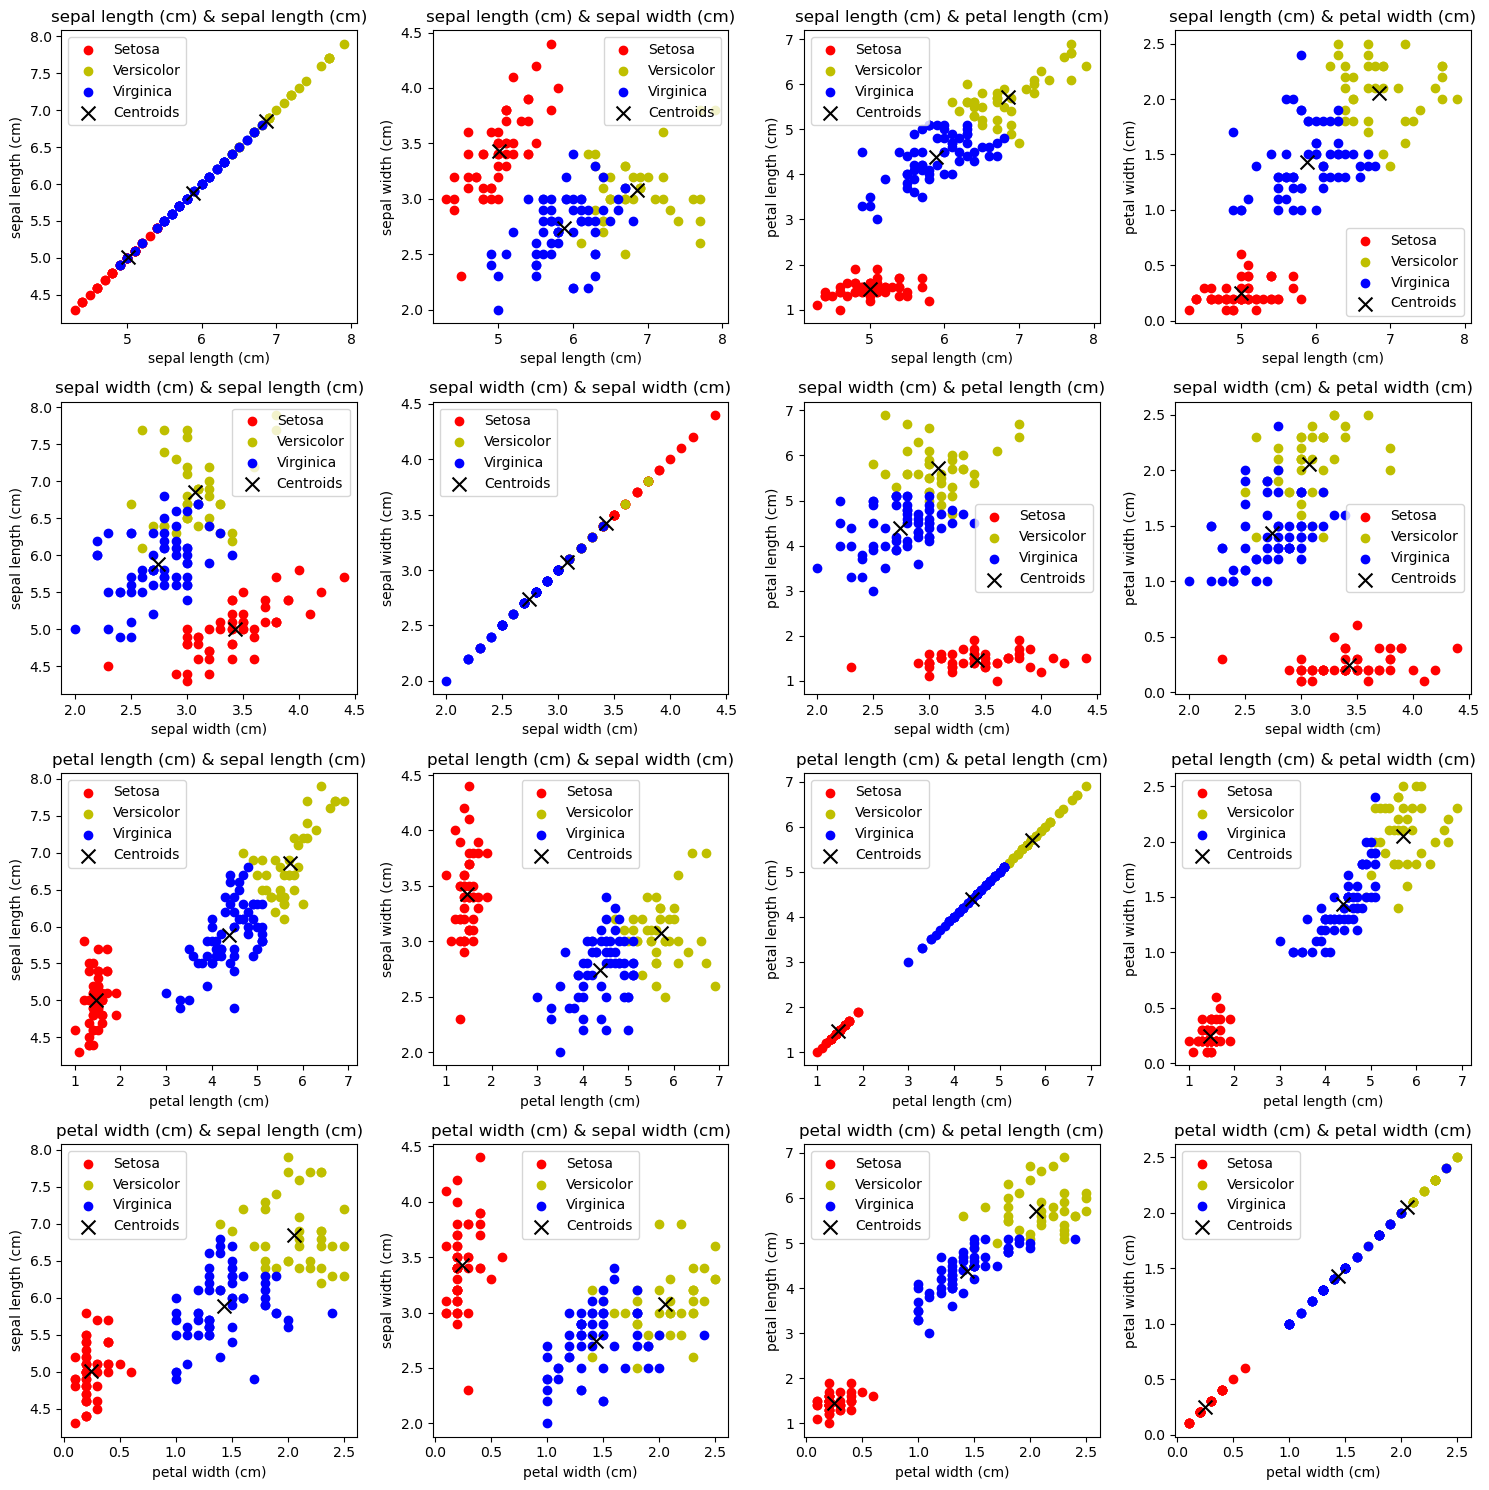

Adjusted Rand Score for your custom K-Means on Iris dataset: 0.7163421126838476


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

def k_means(data, k, max_iters=100):
    
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

data = load_iris()
X = data.data
y = data.target  # truth labels
feature_names = data.feature_names  # Getting the feature names

k = 3 # Specifying the number of clusters

custom_labels, custom_centroids = k_means(X, k)

custom_adjusted_rand_score = adjusted_rand_score(y, custom_labels)

fig, axes = plt.subplots(len(feature_names), len(feature_names), figsize=(15, 15))

for i in range(len(feature_names)):
    for j in range(len(feature_names)):

        feature1 = X[:, i]
        feature2 = X[:, j]

        # Plotting the data points
        for cluster_label in range(k):
            species_data = X[custom_labels == cluster_label]
            axes[i, j].scatter(
                species_data[:, i],
                species_data[:, j],
                label=species_labels[cluster_label],
                c=colors[cluster_label],
            )

        # Plotting the centroids
        axes[i, j].scatter(
            custom_centroids[:, i],
            custom_centroids[:, j],
            c='black',
            marker='x',
            s=100,
            label='Centroids',
        )

        axes[i, j].set_xlabel(feature_names[i])
        axes[i, j].set_ylabel(feature_names[j])
        axes[i, j].set_title(f'{feature_names[i]} & {feature_names[j]}')
        axes[i, j].legend()

plt.tight_layout()
plt.show()

print("Adjusted Rand Score for your custom K-Means on Iris dataset:", custom_adjusted_rand_score)


The scikit-learn K-Means implementation has a higher Adjusted Rand Score (0.7302 > 0.7163), which suggests that it performs better in terms of clustering the Iris dataset according to the truth labels. 